## この課題の目的
スクラッチを通してニューラルネットワークの基礎を理解する
<br>画像データの簡単な扱い方を知る

## スクラッチによる実装
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。
<br>今回は多クラス分類を行う3層のニューラルネットワークを作成します。
<br>層の数などは固定した上でニューラルネットワークの基本を確認しましょう。
<br>次のSprintで層を自由に変えられる設計にしていきます。

### データセットの用意
MNISTデータセットを使用します。
<br>以下のコードを実行すればscikit-learnによりデータセットをダウンロードし、展開まで行えます。
<br>はじめて実行した際に、mnist_dirで指定した場所にファイルがダウンロードされます。
<br>
<br>データセットをダウンロードするコード

In [68]:
import numpy as np
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

astypeはndarrayの型を変換できるメソッドである。
<br>numpy.ndarray.astype — NumPy v1.15 Manual
<br>
<br>MNISTとは？
<br>画像分類のための定番データセットで、手書き数字認識を行います。
<br>このデータセットには学習用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかが含まれています。
<br>
<br>画像データとは？
<br>デジタル画像は点の集合で、これをピクセルと呼びます。
<br>一般的に白黒画像であればピクセルには0〜255の値が含まれます。
<br>一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。
<br>機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。
<br>0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。

### データセットの確認
まず、どういったデータなのかを見てみます。
サンプルコード

In [69]:
print(x_train.shape) # (60000, 28, 28)
print(x_test.shape) # (10000, 28, 28)
print(x_train[0].dtype) # uint8
print(x_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [70]:
#フラットにする
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)

In [71]:
X_train.shape

(60000, 784)

各データは784次元の特徴量を持ちます。
<br>これは28×28ピクセルの白黒画像を一列に並べた状態です。
<br>これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。
<br>一列になっていることを、平滑化（flatten）してあるという風に表現します。
<br>
<br>補足
<br>ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。
<br>一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。
<br>画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。
<br>さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。
<br>しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。
<br>画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。

### 画像データの可視化
次に、画像データを可視化します。
可視化する上では、縦横の形の情報を持つ必要があるので、ndarrayのreshapeを使用して2次元配列とします。そしてplt.imshowに渡します。
サンプルコード

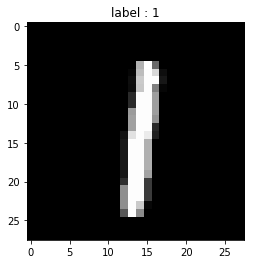

In [72]:
#可視化
import matplotlib.pyplot as plt
%matplotlib inline
index = 40
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

### 発展的話題
画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、
<br>plt.imshowはより自由な配列を画像として表示することが可能です。
<br>例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。2

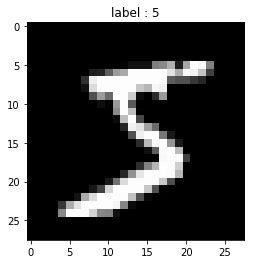

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [73]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。

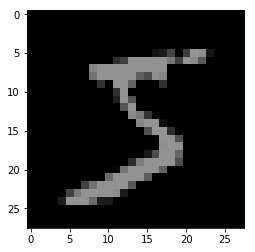

In [74]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。

### 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。
<br>色は理想的には連続値であり、それを特徴量とするからです。以下のコードで変換可能です。

In [75]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際にはone-hot表現に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。
サンプルコード

In [76]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


sklearn.preprocessing.OneHotEncoder — scikit-learn 0.20.0 documentation
さらに、学習用データ6万枚の内2割を検証用データとして分割してください。学習用データが48000枚、検証用データが12000枚となります。
サンプルコード

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


### 【問題1】ニューラルネットワーク分類器のクラスを作成
ニューラルネットワーク分類器のクラスScratchSimpleNeuralNetrowkClassifierを作成してください。
<br>以下が雛形です。基本的な構成は機械学習編の線形回帰やロジスティック回帰などと同様です。
<br>雛形

In [78]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [79]:
# test the batch
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=10)
print(len(get_mini_batch)) # 4800
print(get_mini_batch[5])

4800
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]))


In [96]:
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

import math

class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    num_epoc : int
      エポック数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.epoc,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.epoc,)
      検証用データに対する損失の記録
    """

    def __init__(self, num_epoc=40, lr=0.01, bias=True, verbose=True, batch_size=10, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, metrics="acc"):
        # ハイパーパラメータを属性として記録
        self.num_epoc = num_epoc
        self.lr = lr
        self.verbose = verbose
        self.batch_size = batch_size # バッチサイズ
        self.n_features = n_features # 特徴量の数
        self.n_nodes1 = n_nodes1 # 1層目のノード数
        self.n_nodes2 = n_nodes2 # 2層目のノード数
        self.n_output = n_output # 出力のクラス数（3層目のノード数）
        self.sigma = sigma # ガウス分布の標準偏差
        self.metrics = metrics
        
        #  parameterの更新
        self.W1 = sigma*np.random.randn(n_features, n_nodes1)
        self.b1 = sigma*np.random.randn(1, n_nodes1)
        self.W2 = sigma*np.random.randn(n_nodes1, n_nodes2)
        self.b2 = sigma*np.random.randn(1, n_nodes2) 
        self.W3 = sigma*np.random.randn(n_nodes2, n_output)
        self.b3 = sigma*np.random.randn(1, n_output) 
        
        # lossを記録する配列を用意
        self.train_loss = np.zeros(self.num_epoc)
        self.val_loss = np.zeros(self.num_epoc)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        if y.ndim == 1:
            y = y[:, np.newaxis]
        
        if np.any(y_val):
            if y_val.ndim == 1:
                y_val = y_val[:, np.newaxis]
        
       # 以下をニューラルネットワークのクラス内で呼び出す
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        
        for i in  range(self.num_epoc):
            for mini_X_train, mini_y_train in get_mini_batch:
                # FP
                a1 = np.dot(mini_X_train, self.W1) + self.b1
                z1 = np.tanh(a1)
                a2 = np.dot(z1, self.W2) + self.b2
                z2 = np.tanh(a2)
                a3 = np.dot(z2, self.W3) + self.b3
                z3 = self._softmax(a3)
                
                loss = self._cross_entropy(z3, mini_y_train)
                
                # BP
                a3 =  z3 - mini_y_train
                 # 3層目
                z2_L = np.dot(a3, self.W3.T)
                self.W3 -= self.lr * np.dot(z2.T, a3)
                self.b3 -= self.lr * np.mean(a3, axis=0)

                # ２層目
                a2_L = z2_L  *  (1 - z2**2)
                z1_L = np.dot(a2_L,  self.W2.T)
                self.W2 -= self.lr * np.dot(z1.T, a2_L)
                self.b2 -= self.lr * np.mean(a2_L, axis=0)
                
                # １層目
                a1_L = z1_L * (1 - z1**2)
                self.W1 -= self.lr * np.dot(mini_X_train.T, a1_L)
                self.b1 -= self.lr * np.mean(a1_L, axis=0)
            
            #評価値
            train_pred = self._hypothesis(X)
            self.train_loss[i] = self._cross_entropy(train_pred, y)
            
            if np.any(X_val):
                val_pred = self._hypothesis(X_val)
                self.val_loss[i] = self._cross_entropy(val_pred, y_val)
                acc = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_pred, axis=1))
                      
                if self.verbose:
                    print("epoch:{0} train_loss: {1} val_loss: {2} {3}: {4}".format(i+1, self.train_loss[i], self.val_loss[i], self.metrics, acc))
                    
            else:
                if self.verbose:
                      print("epoch:{0} loss: {1}".format(i+1, self.train_loss[i]))   
    
    def _hypothesis(self, X):
        a1 = np.dot(X, self.W1) + self.b1
        z1 = np.tanh(a1)
        a2 = np.dot(z1, self.W2) + self.b2
        z2 = np.tanh(a2)
        a3 = np.dot(z2, self.W3) + self.b3
        z3 = self._softmax(a3)
        return z3
    
    def _softmax(self, z):
        c = np.max(z)
        z = z - c
        ex = np.exp(z)
        return ex / (np.sum(ex, axis=1))[:, np.newaxis]
        
    def _sigmoid(self, z):
        e = math.e
        return 1/(1+(e**-z))

       
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        推定結果
        """
        a1 = np.dot(X, self.W1) + self.b1
        z1 = np.tanh(a1)
        a2 = np.dot(z1, self.W2) + self.b2
        z2 = np.tanh(a2)
        a3 = np.dot(z2, self.W3) + self.b3
        
        z3 = self._softmax(a3)

        return z3
        
    def _cross_entropy(self,z, y):
        
        return - sum(sum(y * np.log(z))) / len(y)
    
    def plot_learning_curve(self):
        """
        学習曲線をプロットします。

        loss : array
        一回ごとの勾配降下方のロスのログ(train)
         val_los : array
        一回ごとの勾配降下方のロスのログ(val or test)
        """
        plt.figure(figsize=(6, 6))
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.title("model_loss")
        plt.plot(self.train_loss, label="train_loss")
        plt.plot(self.val_loss, label="val_loss")
        plt.legend()
    
    def _plot_wrong_image(self, X, y, y_pred):
        #まちがえている画像をプロットします
        num = 36 # いくつ表示するか

        true_false = y_pred == y
        false_list = np.where(true_false==False)[0].astype(np.int)

        if false_list.shape[0] < num:
            num = false_list.shape[0]
        fig = plt.figure(figsize=(6, 6))
        fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
        for i in range(num):
            ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
            ax.set_title("{} / {}".format(y_pred[false_list[i]],y[false_list[i]]))
            ax.imshow(X.reshape(-1,28,28)[false_list[i]], cmap='gray')
    

In [97]:
model = ScratchSimpleNeuralNetrowkClassifier()

In [98]:
model.fit(X_train, y_train, X_val, y_val)

epoch:1 train_loss: 0.2079540981750598 val_loss: 0.2123730580388156 acc: 0.93425
epoch:2 train_loss: 0.1246212341147878 val_loss: 0.1473349145488984 acc: 0.9545
epoch:3 train_loss: 0.10456280495506434 val_loss: 0.1423221565078257 acc: 0.9578333333333333
epoch:4 train_loss: 0.09883311756796549 val_loss: 0.14952085266367485 acc: 0.9566666666666667
epoch:5 train_loss: 0.08566563557367636 val_loss: 0.14459466741948487 acc: 0.961
epoch:6 train_loss: 0.06570244866100622 val_loss: 0.13079634887639005 acc: 0.9640833333333333
epoch:7 train_loss: 0.04701506189431717 val_loss: 0.11768304458292998 acc: 0.9685833333333334
epoch:8 train_loss: 0.03896236551998387 val_loss: 0.11643014400866845 acc: 0.9686666666666667
epoch:9 train_loss: 0.0412664459369082 val_loss: 0.12629384670656085 acc: 0.969
epoch:10 train_loss: 0.014969825368429843 val_loss: 0.10135888413139842 acc: 0.97525
epoch:11 train_loss: 0.012531407978636262 val_loss: 0.09852194670507033 acc: 0.9759166666666667
epoch:12 train_loss: 0.00449

In [99]:
y_pred = model.predict(X_test)

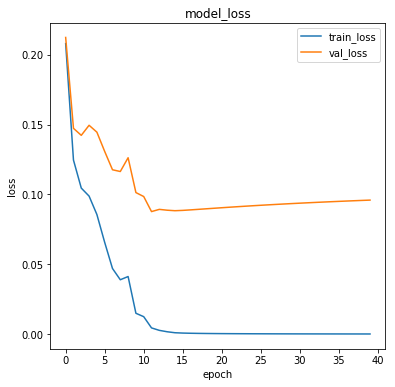

In [100]:
model.plot_learning_curve()

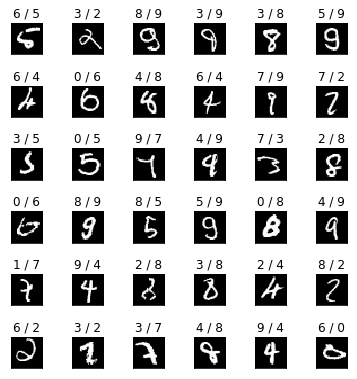

In [93]:
"""
誤分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証用データの正解ラベル(n_samples,)
X_val : 検証用データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt

num = 36 # いくつ表示するか

true_false = y_pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_test.reshape(-1,28,28)[false_list[i]], cmap='gray')

### ミニバッチ処理
これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する確率的勾配降下法が一般的です。分割した際のひとかたまりをミニバッチ、そのサンプル数をバッチサイズと呼びます。
今回はバッチサイズを10とします。今回使う学習用データは48000枚ですから、4800回の更新を繰り返すことになります。ニューラルネットワークではこれを4800回イテレーション（iteration）すると呼びます。学習データを一度全て見ると1回のエポック（epoch）が終わったことになります。このエポックを複数回繰り返し、学習が完了します。
これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。
コード

In [ ]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

このクラスをニューラルネットワークのクラス内でインスタンス化し、for文を使うことでミニバッチが取り出せます。

In [ ]:
# 以下をニューラルネットワークのクラス内で呼び出す

get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=10)

print(len(get_mini_batch)) # 4800
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

__getitem__や__next__は__init__などと同じ特殊メソッドの一種です。

### フォワードプロパゲーション
三層のニューラルネットワークのフォワードプロパゲーションを作成します。
<br>以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。
<br>各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

In [ ]:
batch_size = 10 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）

### 活性化関数（フォワードプロバゲーション）
活性化関数を作成し、フォワードプロパゲーションの中で使用します。
<br>切り替えられるように実装することを推奨しますが、片方でも構いません。
<br>「シグモイド関数」

$$
f(Z) = sigmoid(A) = \frac{1}{1+exp(-A)}
$$

In [ ]:
# def sigmoid(z):
#     e = math.e
#     return 1/(1+(e**-z))

指数関数exp(−A)の計算はnp.expを使用してください。
<br>numpy.exp — NumPy v1.15 Manual
<br>「ハイパボリックタンジェント関数」
<br>次の数式で表されますが、np.tanhひとつで実現できます。

$$
f(Z) = tanh(A) = \frac{exp(A) - exp(-A)}{exp(A) + exp(-A)}
$$

In [ ]:
# np.tanh(X_train)

numpy.tanh — NumPy v1.15 Manual
<br>＊現在ではこれらの代わりにReLUと呼ばれる活性化関数が一般的です。次のSprintで扱います。

### ソフトマックス関数
ソフトマックス関数を作成し、フォワードプロパゲーションの中で使用します。
<br>これも活性化関数の一種ですが、多クラス分類の出力層で使われる特性上、区別して扱われることが多いです。
<br>次の数式です。

$$
Z_{3\_k} = \frac{exp(A_{3\_k})}{\sum_{i=1}^{n}exp(A_{3\_i})}
$$

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

Z3k:k番目のクラスの確率ベクトル (batch_size,)
<br>A3k:k番目のクラスにあたる前の層からのベクトル (batch_size,)
<br>n: クラスの数、n_output。今回のMNISTでは10。
<br>分母は全てのクラスに相当する値を指数関数に通した上で足し合わせたものです。その中で、分子に 
<br>k番目のクラスを持ってくることで、 k番目のクラスである確率が求まります。
<br>これを10クラス分計算し、合わせたものが Z3です。

### 交差エントロピー誤差
目的関数（損失関数）を作成します。
<br>多クラス分類の目的関数である交差エントロピー誤差Lは次の数式です。

$$
L = - \sum_{i}^{n}Y_i log(Z_{3\_i})
$$

Yi:i番目のクラスの正解ラベル（one-hot表現で0か1）

### バックプロパゲーション
三層のニューラルネットワークのバックプロパゲーションを作成します。確率的勾配降下法を行う部分です。
<br>数式を以下に示します。
<br>まず、i層目の重みとバイアスの更新式です。 
<br>WiとBiに対し、更新後のW'iとB'iは次の数式で求められます。

$$
W_i^{\prime} = W_i - \alpha E(\frac{\partial L}{\partial W_i}) \\
B_i^{\prime} = B_i - \alpha E(\frac{\partial L}{\partial B_i})
$$

α: 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）
<br>∂L∂Wi:Wiに関する損失 
<br>Lの勾配∂L∂Bi:Biに関する損失 
<br>Lの勾配
<br>E(): ミニバッチ方向にベクトルの平均を計算
<br>この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。
<br>
<br>勾配 
<br>∂L∂Wiや∂L∂Biを求めるために、バックプロパゲーションを行います。以下の数式です。
<br>ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。
<br>「3層目」

## 【問題2】学習曲線のプロット
学習曲線をプロットしてください。
ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

## 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

## （オプション）誤分類の確認
誤分類した画像はどのようなものだったかを見てみましょう。推定値を用意し、以下のコードを実行してください。
コード

/anaconda/envs/tesflowmachine/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


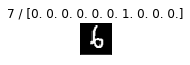

In [95]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証用データの正解ラベル(n_samples,)
X_val : 検証用データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt

num = 36 # いくつ表示するか

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')